#                 STATISTICAL APPROACH TO HOME PREDICTION DATA

    In this chapter, I will continue to my capstone project about House predictions
    approaching statistically way.Here are my three different observations:
        1) Comparing average price of homes with 2 and 3 bedrooms.
        2) Determining average price in Issaquah greater than average price in Kirkland or not
        3) Probability of a home hired by a family just moves into this area.
    Ok let`s get start with the party.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from scipy.stats import norm
from scipy.special import ndtr as ndtr

In [2]:
house = pd.read_csv('data.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#  1)                                   COMPARING AVERAGE PRICE

    Inquiry:  
      A mortgage company wants to test if there is a significant difference between 
      the mean price of homes with 3 bedrooms and
      the mean price of homes with 2 bedrooms in given dataset.
      (significance level=0.05)

      Let M2 and M3 be mean of homes that have 3 bedrooms and 2 bedrrooms respectively.

      H0: M2 = M3 (M2 - M3 = 0)
      H1: M2 ≠ M3 (M2 - M3 ≠ 0)


# Examining Houses with 3 Bedrooms

In [3]:
len(house[house['bedrooms']==3])

2032

In [4]:
h3 = house[house['bedrooms']==3]
house_3 = h3['price']

In [108]:
round(np.mean(house_3),2)

488613.02

In [109]:
round(np.std(house_3),2)

690338.86

# Examining Houses with 2 Bedrooms

In [7]:
len(house[house['bedrooms']==2])

566

In [8]:
h2 = house[house['bedrooms']==2]
house_2 = h2['price']

In [106]:
round(np.mean(house_2),2)

391621.92

In [107]:
round(np.std(house_2),2)

194947.17

let`s take a sample from both house type that contains 50 houses from M2 and M3 respectively.(50<(566/10)),(50<(2032/10))
For the sake of 10% rule being independent, 50 is a plausible value which is 
less than 10% of number of houses that have 2 and 3 bedrooms.

In [11]:
# I am finding mean and standard deviation of the sample respectively for houses with 2 bedrooms.

In [12]:
seed(35)
sample_2 = np.random.choice(house_2,50)
sample_mean_2 = np.mean(sample_2)
round(sample_mean_2,2)

425348.56

In [98]:
seed(35)
sample_std_2 = np.std(house_2)/(50**0.5)
round(sample_std_2,2)

27569.69

In [14]:
#I will find mean and standard deviation of the sample belongs to houses with 3 bedrooms.
# For the sake of 10% independent rule, I will choose 50 houses.(50<(2032/10))

In [15]:
seed(35)
sample_3 = np.random.choice(house_3,50)
sample_mean_3 = np.mean(sample_3)
round(sample_mean_3,2)

539394.89

In [99]:
seed(35)
sample_std_3 = np.std(house_3)/(50**0.5)
round(sample_std_3,2)

97628.66

Now let`s apply z test

In [104]:
z = (sample_mean_3-sample_mean_2)/np.sqrt(np.sum((sample_std_2**2/50**0.5)+(sample_std_3**2/50**0.5)))
round(z,2)

2.99

In [105]:
#significance level = 0.05
z_critical = norm.ppf(0.975)
round(z_critical,2)

1.96


# RESULT

    In this frequentis statistic,z value is way beyond z_critical value so we have to reject null hyptohesis(M3-M2=0) 
    which we accept alternative hypothesis. It indicates that there is a significance difference between mean price of homes       with 2 bedrooms and mean price of homes with 3 bedrooms.

    Now let`s form a normal distribution graph )

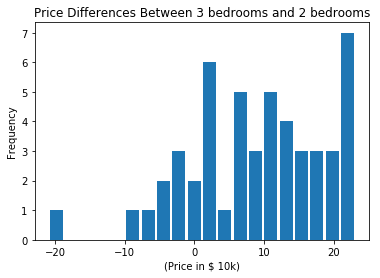

In [111]:
seed(35)
a = np.random.normal((488613.02-391621.92)/10000,np.sqrt(((690338.86)**2/50)+(194947.17)**2/50)/10000,50)
_ = plt.hist(a,bins = 20,rwidth = 0.85)
_ = plt.xlabel('(Price in $ 10k)')
_ = plt.ylabel('Frequency')
_ = plt.title('Price Differences Between 3 bedrooms and 2 bedrooms')
plt.show()

# 2) Is average price in Issaquah greater than average price in Kirkland?

In [88]:
#Here is the list of cities in Washington
city = house['city']
city_num = city.value_counts()
city_num.head(7)

Seattle     1573
Renton       293
Bellevue     286
Redmond      235
Kirkland     187
Issaquah     187
Kent         185
Name: city, dtype: int64

We will inquiry house prices in two same size cities, 
Kirkland and Issaquah(both city has 187 homes)
if average price of homes in Issaquah greater than 
average price of homes in Kirkland.

If I investigate having normal distribution conditions:
1) 187 homes were randomly choosen homes from both cities seperately.
2) 187 homes for Kirkland is below 10% of total homes.(Independent)
   (Appearently number of homes in Kirkland is near 22000)
    same thing valid for Issaquah.187 homes is quite under 
    the total number of homes(10000) in it.
3) Our sample is reasonably large 187>30(for both sample)

I`d like to share steps to be taken for reaching correct estimation. 
First, I will set up Null and Alternative hypothesises,
Let Misq,Mki be mean of sample means 

H0: Misq≤Mki ↔  Misq-Mki≤0
H1: Misq>Mki ↔  Misq-Mki>0
Significance level: α=0.05


And then I will apply z formula:
z = (Misq-Mki)/(np.sqrt(np.sum((Sisq**2)/(nisq**2)+(Ski**2)/(nki**2)))

In [ ]:
Kirkland = house[house.city == 'Kirkland']
round(np.mean(Kirkland['price']),2)

In [ ]:
round(np.std(Kirkland['price']),2)

In [ ]:
Issaquah = house[house.city == 'Issaquah']
round(np.mean(Issaquah['price']),2)

In [ ]:
round(np.std(Issaquah['price']),2)

In [ ]:
#Let`s start finding with z in order to see whether it falls into area within 95% interval or not.
z = (596163.75-651583.59)/np.sqrt(np.sum((245008.93**2/187)+(368857.02**2/187)))
round(z,2)

    Now it is time to check falling this z value into within 95% confidence interval or not.
    For this reason, we need to figure our p value out.(significance level = 0.05)

    p value of -1.71 on z table is 0.0436 which is smaller than significance level(0.05)
    We will reject the Null Hypthohesis in favor of alternative hypothesis.
        It means average price of Homes in Issaquah is not expensive than Kirkland.
        In other words home prices in Kirkland is expensive than home prices in Issaquah.

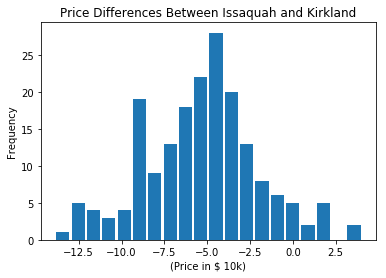

In [92]:
seed(47)
a = np.random.normal((596163.75-651583.59)/10000,np.sqrt(((368857.02)**2/187)+(245008.93)**2/187)/10000,187)
_ = plt.hist(a,bins = 20,rwidth = 0.85)
_ = plt.xlabel('(Price in $ 10k)')
_ = plt.ylabel('Frequency')
_ = plt.title('Price Differences Between Issaquah and Kirkland')
plt.show()

###   RESULT

As you see on the graph, major data gathered below 0 that mean of home prices in Issaquah is lower than mean of home prices in Kirkland.

# 3)  BAYES THEOREM

    Wederson Family moves from California to Washington. 
    They search a home that has 2 bathrooms and 3 or 4 bedrooms in new area.
    What is the probability of they rent a home with condition is not lower than 4(with Ms. Wederson`s demand) 
    of given opsions above?
    (Solve by using Bayes Theorem) 


X: probability of homes with 3 or 4 bedrooms and 2 bathrooms
Y: probability of homes with not 3 or 4 bedrooms and not 2 bathrooms
A: probability of condition greater than or equal to 4 
B: probability of condition less than to 4 

    Mr Wederson is searching among the homes that have 3 or 4 bedrooms and 2 bathrooms.(X)
    Of those homes,with his wife`s request, he will try 
    to find out a home condition is greater than or equal to 4.(A)
    statistically,he is seeking P(A/X)

        P(A|X)=(P(X|A)*P(A))/P(X)    (BAYES T.)

Question: How many homes with 3 or 4 bedrooms and 2 bathrooms are there?

In [65]:
x = house[((house.bedrooms==3)|(house.bedrooms==4))&(house.bathrooms==2)]

print('P(X):{}{}{}'.format(len(x),'/',4600))

P(X):355/4600


Question: How many home conditions does have greater than or equal to 4?

In [67]:
up_4 = house[house.condition>=4]

print('P(A):{}{}{}'.format(len(up_4),'/',4600))

P(A):1687/4600


In [75]:
#Let`s find out of up_4 how many homes are there with 3 or 4 bedrooms and 2 bathrooms.
#P(X|A)=?
t = len(up_4[((up_4.bedrooms==3)|(up_4.bedrooms==4)) & (up_4.bathrooms==2)])
print('P(A|X):{}{}{}'.format(t,'/',355))

P(A|X):177/355


    Now, I am plug in values into Bayes formula
    
    P(X|A)=(P(A|X)*P(X))/P(A)    (BAYES T.)

In [74]:
(((177/355)*(355/4600))/(1687/4600))*100

10.49199762892709

# Result

    Probability of Wederson Family choosing homes they wish is 10.49%.
    They seem unlucky but thank to today`s technology and they easily can access or find 
    those homes by filtering method in any home selling websites.